In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. One-sample tests

In [ ]:
from scipy.stats import norm # Useful to compute CDF and quantile of the Gaussian distribution
from scipy.stats import t # Useful to compute CDF and quantile of the Student distribution

## 1.1 $Z$-test for the mean

A network of $n=10$ sensors measures the concentration of ozone in various places of Paris. Due to local variability and measure noise, on a given day, the ozone concentration recorded by the $i$-th sensor is representation by a random variable $X_i = \mu + \varepsilon_i$, where $\mu$ is the mean ozone concentration on this day and the variables $(\varepsilon_i)_{1 \leq i \leq n}$ are independent $\mathcal{N}(0,\sigma^2)$ variables, with known standard deviation $\sigma = 10~\mu\mathrm{g}/\mathrm{m}^3$. In the block below, we give the measurements corresponding to 3 different days.



In [ ]:
ozone_day_1 = np.array([24.5, 48.0, 32.0, 45.8, 32.1, 35.7, 41.1, 30.4, 30.8, 27.5])
ozone_day_2 = np.array([48.0, 57.3, 56.1, 43.2, 37.9,  39.9, 40.3,  28.7, 45.7, 57.2])
ozone_day_3 = np.array([56.2, 54.1, 53.4, 46.2, 53.5, 48.0, 57.5, 65.2, 49.3, 58.5])

print("Empirical mean for day 1:", np.mean(ozone_day_1))
print("Empirical mean for day 2:", np.mean(ozone_day_2))
print("Empirical mean for day 3:", np.mean(ozone_day_3))

Empirical mean for day 1: 34.790000000000006
Empirical mean for day 2: 45.43
Empirical mean for day 3: 54.19000000000001


The limit value of mean ozone concentration fixed by WHO is $\mu_0 = 40~\mu\mathrm{g}/\mathrm{m}^3$. At the confidence level $5\%$, for which days was the mean ozone concentration above this threshold? You may also indicate the $p$-value for each day.

In [ ]:
sigma = 10 # Known standard deviation of the sample
mu_0 = 40 # Limit value to be tested

In [ ]:
# Your code here

In [ ]:
# Correction
# We want to detect if µ > µ_0. So we set H_0 = {µ ≤ µ_0}, H_1 = {µ > µ_0}.
# The rejection region thus writes {(\bar{X}_n-µ_0)/\sqrt{\sigma^2/n} ≥ \phi_{1-\alpha}
# We write a function which takes the sample and alpha and prints the result of the test
def z_test(x, alpha):
  n = len(x)
  z_score = (np.mean(x)-mu_0)/(sigma/np.sqrt(n))
  print("z-score:", z_score)
  phi = norm.ppf(1-alpha)
  print("quantile:", phi)
  if (z_score>phi):
    print("The mean concentration is significantly above the limited value.")
  else:
    print("The mean concentration is not significantly above the limited value.")
  p_value = 1-norm.cdf(z_score)
  print("p-value:", p_value)

z_test(ozone_day_1, .05)
z_test(ozone_day_2, .05)
z_test(ozone_day_3, .05)

z-score: -1.6475466609477238
quantile: 1.6448536269514722
The mean concentration is not above the limited value.
p-value: 0.9502771331961711
z-score: 1.71711676947143
quantile: 1.6448536269514722
The mean concentration is above the limited value.
p-value: 0.04297891938369336
z-score: 4.487271999778934
quantile: 1.6448536269514722
The mean concentration is above the limited value.
p-value: 3.6070474398464114e-06


## 1.2 $\mathrm{t}$-test for the mean

With the same data as above, we no longer assume that $\sigma$ is known. How to adapt the test?

Remark: to compute $\sqrt{S^2_n}$ for a sample `x`, you can use `np.std(x, ddof=1)`.

In [ ]:
print("Standard deviation for day 1:", np.std(ozone_day_1, ddof=1))
print("Standard deviation for day 2:", np.std(ozone_day_2, ddof=1))
print("Standard deviation for day 3:", np.std(ozone_day_3, ddof=1))

Standard deviation for day 1: 7.786091588353057
Standard deviation for day 2: 9.418781473441479
Standard deviation for day 3: 5.597310862270282


In [ ]:
# Your code here

In [ ]:
# Correction
# The rejection region now writes {(\bar{X}_n-µ_0)/\sqrt{S^2_n/n} ≥ t{n-1,1-\alpha}
# We write a function which takes the sample and alpha and prints the result of the test
def t_test(x, alpha):
  n = len(x)
  t_score = (np.mean(x)-mu_0)/(np.std(x, ddof=1)/np.sqrt(n))
  print("t-score:", t_score)
  qt = t.ppf(1-alpha,n-1)
  print("quantile:", qt)
  if (t_score>qt):
    print("The mean concentration is significantly above the limited value.")
  else:
    print("The mean concentration is not significantly above the limited value.")
  p_value = 1-t.cdf(t_score,n-1)
  print("p-value:", p_value)

t_test(ozone_day_1, .05)
t_test(ozone_day_2, .05)
t_test(ozone_day_3, .05)

t-score: -2.116012433519574
quantile: 1.8331129326536335
The mean concentration is not above the limited value.
p-value: 0.9682763818552287
t-score: 1.8230774058334978
quantile: 1.8331129326536335
The mean concentration is not above the limited value.
p-value: 0.05080299179082126
t-score: 8.016835423642858
quantile: 1.8331129326536335
The mean concentration is above the limited value.
p-value: 1.0883036373088295e-05


What is your conclusion?

Remark: one-sample $\mathrm{t}$-tests can also be performed using the `ttest_1samp()` function of `scipy.stats`, as follows:

In [ ]:
from scipy.stats import ttest_1samp

# Application on the sample ozone_day_1
# popmean is the value of µ_0
# alternative='greater' means that H_1 is {µ > µ_0}
t_score, p_value = ttest_1samp(ozone_day_2, popmean=mu_0, alternative='greater')
print("t-score:", t_score)
print("p-value:", p_value)

t-score: 1.8230774058334975
p-value: 0.05080299179082123


# 2. Two-sample tests

In this section, we work with the grades of IMI and SEGF students at the 2023 exam.

Size of grades_imi: 54
Size of grades_segf: 26
Mean of grades_imi: 14.074074074074074
Mean of grades_segf: 13.076923076923077
Standard deviation of grades_imi: 2.323805043716438
Standard deviation of grades_segf: 3.0844523264019097


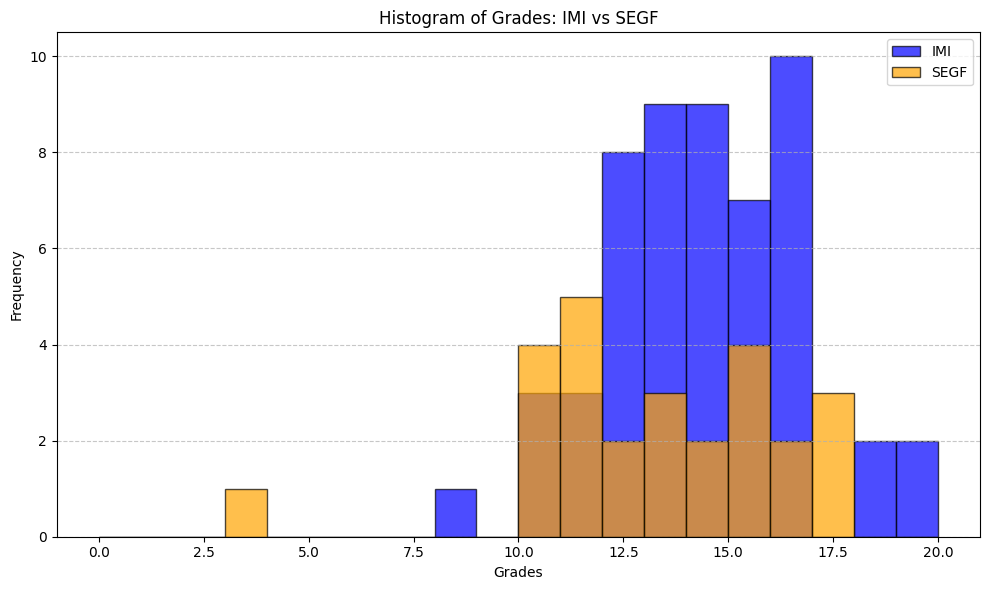

In [2]:
# Data for grades_imi and grades_segf
grades_imi = np.array([8.5, 10, 10, 10, 11, 11.5, 11.5, 12, 12, 12,
                       12, 12.5, 12.5, 12.5, 12.5, 13, 13, 13, 13, 13,
                       13, 13, 13, 13.5, 14, 14, 14, 14, 14, 14,
                       14.5, 14.5, 14.5, 15, 15, 15.5, 15.5, 15.5, 15.5, 15.5,
                       16, 16, 16, 16, 16, 16, 16.5, 16.5, 16.5, 16.5,
                       18.5, 18.5, 19, 19])

grades_segf = np.array([3.5, 10, 10, 10.5, 10.5, 11, 11, 11, 11.5, 11.5,
                        12.5, 12.5, 13.5, 13.5, 13.5, 14, 14.5, 15, 15.5, 15.5,
                        15.5, 16, 16.5, 17, 17, 17.5])

# Plot histogram of the two samples
plt.figure(figsize=(10, 6))
bins = np.linspace(0, 20, 21)  # Define bins range

plt.hist(grades_imi, bins=bins, alpha=0.7, label='IMI', color='blue', edgecolor='black')
plt.hist(grades_segf, bins=bins, alpha=0.7, label='SEGF', color='orange', edgecolor='black')

# Add labels, legend, and title
plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.title('Histogram of Grades: IMI vs SEGF')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()
#plt.savefig("imi-segf.eps")

# Calculate means and standard deviations
n_imi = len(grades_imi)
n_segf = len(grades_segf)

mean_imi = np.mean(grades_imi)
mean_segf = np.mean(grades_segf)

sd_imi = np.std(grades_imi, ddof=1)
sd_segf = np.std(grades_segf, ddof=1)

# Print results
print("Size of grades_imi:", n_imi)
print("Size of grades_segf:", n_segf)

print("Mean of grades_imi:", mean_imi)
print("Mean of grades_segf:", mean_segf)

print("Standard deviation of grades_imi:", sd_imi)
print("Standard deviation of grades_segf:", sd_segf)

## 2.1 Equality of variance

At the confidence level $5\%$, can you reject the hypothesis that the two samples have different variances?

In [3]:
from scipy.stats import f # Fisher distribution

In [ ]:
# Your code here

In [4]:
# Correction

# Here the hypotheses are H_0 = {\sigma_imi=\sigma_segf}, H_1 = {\sigma_imi≠\sigma_segf}
alpha = .05
f_score = sd_imi**2/sd_segf**2
print("f-score:", f_score)
quant_inf = f.ppf(alpha/2,n_imi-1,n_segf-1)
quant_sup = f.ppf(1-alpha/2,n_imi-1,n_segf-1)
print("quantiles:", quant_inf, quant_sup)

if (quant_inf<=f_score) and (f_score<=quant_sup):
  print("The heteroscedasticity hypothesis is not rejected.")
else:
  print("The heteroscedasticity hypothesis is rejected.")

f-score: 0.5676011356373338
quantiles: 0.5258798208297457 2.0695891501178783
The heteroscedasticity hypothesis is not rejected.


## 2.2 Tests on the mean

Using a $\mathrm{t}$-test, compute the $p$-value associated to the test of each of the following assertions:


1.   The grades of IMI students and SEGF students do not have the same mean.
2.   The grades of IMI students have a larger mean than the grades of SEGF students.
3.   The grades of IMI students have a smaller mean than the grades of SEGF students.

You can either implement the $\mathrm{t}$-test or use the `scipy.stats` function `ttest_ind()`.

In [ ]:
# Your code here!

In [ ]:
# Correction with direct implementation
from scipy.stats import t # Student distribution

t_score = np.sqrt((n_imi+n_segf-2)/(1/n_imi+1/n_segf))*(mean_imi-mean_segf)/np.sqrt((n_imi-1)*sd_imi**2+(n_segf-1)*sd_segf**2)

# p-value for assertion 1 (H_1 = {µ_imi ≠ µ_segf})
p_value_1 = 2*(1-t.cdf(np.abs(t_score),n_imi+n_segf-2))
print("p-value for assertion 1:", p_value_1)

# p-value for assertion 2 (H_1 = {µ_imi > µ_segf})
p_value_2 = (1-t.cdf(t_score,n_imi+n_segf-2))
print("p-value for assertion 2:", p_value_2)

# p-value for assertion 3 (H_1 = {µ_imi < µ_segf})
p_value_3 = (1-t.cdf(-t_score,n_imi+n_segf-2))
print("p-value for assertion 3:", p_value_3)

In [ ]:
# Correction with ttest_ind()
from scipy.stats import ttest_ind

# p-value for assertion 1 (H_1 = {µ_imi ≠ µ_segf})
t_score_1, p_value_1 = ttest_ind(grades_imi, grades_segf, alternative='two-sided')
print("p-value for assertion 1:", p_value_1)

# p-value for assertion 2 (H_1 = {µ_imi > µ_segf})
t_score_2, p_value_2 = ttest_ind(grades_imi, grades_segf, alternative='greater')
print("p-value for assertion 2:", p_value_2)

# p-value for assertion 3 (H_1 = {µ_imi < µ_segf})
t_score_3, p_value_3 = ttest_ind(grades_imi, grades_segf, alternative='less')
print("p-value for assertion 3:", p_value_3)